In [2]:
import qiskit
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram,plot_distribution
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
from qiskit_aer import Aer, AerSimulator
from qiskit.circuit.library import UGate
from qiskit.quantum_info import Statevector
import pylatexenc
import numpy as np
import math

In [11]:
# DEFINE VARIABLES
w0,u0,w1,u1,eps = 0.90,1,1.35,math.sqrt(2),0.1
theta_1 = (w0 * u0 * eps)
theta_2 = (w0 * u1 * eps)
theta_3 = (w1 * u0 * eps)
theta_4 = (w1 * u1 * eps)
print(theta_1, theta_2, theta_3, theta_4)
# FOR TROTTERIZATION
troter_steps = 10
dtheta_1 = theta_1 / troter_steps
dtheta_2 = theta_2 / troter_steps
dtheta_3 = theta_3 / troter_steps
dtheta_4 = theta_4 / troter_steps

0.09000000000000001 0.12727922061357858 0.135 0.19091883092036788


In [31]:
b0 = QuantumRegister(1, "b0")
b1 = QuantumRegister(1,"b1")
b2 = QuantumRegister(1,"b2")

a0 = QuantumRegister(1, "a0")
a1 = QuantumRegister(1,"a1")
a2 = QuantumRegister(1,"a2")
creg = ClassicalRegister(6,name = "measurement")
quantum_circuit = QuantumCircuit(b0,a0,b1,a1,b2,a2,creg)
# INITIAL STATE 001001
quantum_circuit.x(b1)
quantum_circuit.x(a2)
# FIRST BLOCK H00
# STRING 1
for _ in range(troter_steps):
    quantum_circuit.cx(b0,a1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,a0)
    quantum_circuit.s(b0)
    quantum_circuit.rx(np.pi/2, b0)

    quantum_circuit.p(dtheta_1,b0)

    quantum_circuit.rx(-np.pi/2, b0)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a0)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a1)
    # barrier
    quantum_circuit.barrier(label = "1.2")
    # STRING 2
    quantum_circuit.s(a1)
    quantum_circuit.s(a0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,a0)
    quantum_circuit.s(b0)
    quantum_circuit.rx(np.pi/2, b0)

    quantum_circuit.p(dtheta_1,b0)

    quantum_circuit.rx(-np.pi/2, b0)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a0)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.sdg(a0)
    quantum_circuit.sdg(a1)
    # barrier
    quantum_circuit.barrier(label = "2.3")
    # STRING 3
    quantum_circuit.s(b1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,a0)
    quantum_circuit.s(b0)
    quantum_circuit.rx(np.pi/2,b0)

    quantum_circuit.p(dtheta_1, b0)

    quantum_circuit.rx(-np.pi/2,b0)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a0)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.sdg(b0)
    quantum_circuit.sdg(b1)
    # barrier
    quantum_circuit.barrier(label = "3.4")
    # STRING 4
    quantum_circuit.s(a1)
    quantum_circuit.s(b1)
    quantum_circuit.s(a0)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,a0)
    quantum_circuit.s(b0)
    quantum_circuit.rx(np.pi/2,b0)

    quantum_circuit.p(dtheta_1, b0)

    quantum_circuit.rx(-np.pi/2,b0)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a0)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.sdg(b0)
    quantum_circuit.sdg(a0)
    quantum_circuit.sdg(b1)
    quantum_circuit.sdg(a1)
    # Barrier
    quantum_circuit.barrier(label = "BLOCK 2")
    # BLOCK 2
    # STRING 1
    quantum_circuit.cx(b0,a2)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.s(b0)
    quantum_circuit.rx(np.pi/2, b0)

    quantum_circuit.p(dtheta_2,b0)

    quantum_circuit.rx(-np.pi/2, b0)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a2)
    # BARRIER
    quantum_circuit.barrier(label = "1.2")
    # STRING 2
    quantum_circuit.s(a2)
    quantum_circuit.s(a1)
    quantum_circuit.cx(b0,a2)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.s(b0)
    quantum_circuit.rx(np.pi/2, b0)

    quantum_circuit.p(dtheta_2,b0)

    quantum_circuit.rx(-np.pi/2, b0)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a2)
    quantum_circuit.sdg(a1)
    quantum_circuit.sdg(a2)
    # BARRIER 
    quantum_circuit.barrier(label = "2.3")
    # STRING 3
    quantum_circuit.s(b1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,a2)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.s(b0)
    quantum_circuit.rx(np.pi/2,b0)

    quantum_circuit.p(dtheta_2, b0)

    quantum_circuit.rx(-np.pi/2,b0)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a2)
    quantum_circuit.sdg(b0)
    quantum_circuit.sdg(b1)
    # BARRIER 
    quantum_circuit.barrier(label = "3.4")
    # STRING 4
    quantum_circuit.s(a2)
    quantum_circuit.s(b1)
    quantum_circuit.s(a1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,a2)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.s(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.s(b0)
    quantum_circuit.rx(np.pi/2,b0)

    quantum_circuit.p(dtheta_2, b0)

    quantum_circuit.rx(-np.pi/2,b0)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a1)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,b1)
    quantum_circuit.sdg(b0)
    quantum_circuit.cx(b0,a2)
    quantum_circuit.sdg(b0)
    quantum_circuit.sdg(a1)
    quantum_circuit.sdg(b1)
    quantum_circuit.sdg(a2)
    # BARRIER
    quantum_circuit.barrier(label = "Block 3")
    # BLOCK 3
    # STRING 1
    quantum_circuit.cx(b1,a1)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,a0)
    quantum_circuit.s(b1)
    quantum_circuit.rx(np.pi/2, b1)

    quantum_circuit.p(dtheta_3,b1)

    quantum_circuit.rx(-np.pi/2, b1)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a0)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a1)
    # barrier
    quantum_circuit.barrier(label = "1.2")
    # STRING 2
    quantum_circuit.s(a1)
    quantum_circuit.s(a0)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,a0)
    quantum_circuit.s(b1)
    quantum_circuit.rx(np.pi/2, b1)

    quantum_circuit.p(dtheta_3,b1)

    quantum_circuit.rx(-np.pi/2, b1)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a0)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.sdg(a0)
    quantum_circuit.sdg(a1)
    # barrier
    quantum_circuit.barrier(label = "2.3")
    # STRING 3
    quantum_circuit.s(b2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,a0)
    quantum_circuit.s(b1)
    quantum_circuit.rx(np.pi/2,b1)

    quantum_circuit.p(dtheta_3, b1)

    quantum_circuit.rx(-np.pi/2,b1)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a0)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.sdg(b1)
    quantum_circuit.sdg(b2)
    # barrier
    quantum_circuit.barrier(label = "3.4")
    # STRING 4
    quantum_circuit.s(a1)
    quantum_circuit.s(b2)
    quantum_circuit.s(a0)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,a0)
    quantum_circuit.s(b1)
    quantum_circuit.rx(np.pi/2,b1)

    quantum_circuit.p(dtheta_3, b1)

    quantum_circuit.rx(-np.pi/2,b1)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a0)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.sdg(b1)
    quantum_circuit.sdg(a0)
    quantum_circuit.sdg(b2)
    quantum_circuit.sdg(a1)
    # Barrier 
    quantum_circuit.barrier(label = "Block 4")
    # BLOCK 4
    # STRING 1
    quantum_circuit.cx(b1,a2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.s(b1)
    quantum_circuit.rx(np.pi/2, b1)

    quantum_circuit.p(dtheta_4,b1)

    quantum_circuit.rx(-np.pi/2, b1)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a2)
    # barrier
    quantum_circuit.barrier(label = "1.2")
    # STRING 2
    quantum_circuit.s(a2)
    quantum_circuit.s(a1)
    quantum_circuit.cx(b1,a2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.s(b1)
    quantum_circuit.rx(np.pi/2, b1)

    quantum_circuit.p(dtheta_4,b1)

    quantum_circuit.rx(-np.pi/2, b1)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a2)
    quantum_circuit.sdg(a1)
    quantum_circuit.sdg(a2)
    # barrier
    quantum_circuit.barrier(label = "2.3")
    # STRING 3
    quantum_circuit.s(b2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,a2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.s(b1)
    quantum_circuit.rx(np.pi/2,b1)

    quantum_circuit.p(dtheta_4, b1)

    quantum_circuit.rx(-np.pi/2,b1)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a2)
    quantum_circuit.sdg(b1)
    quantum_circuit.sdg(b2)
    # barrier
    quantum_circuit.barrier(label = "3.4")
    # STRING 4
    quantum_circuit.s(a2)
    quantum_circuit.s(b2)
    quantum_circuit.s(a1)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,a2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.s(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.s(b1)
    quantum_circuit.rx(np.pi/2,b1)

    quantum_circuit.p(dtheta_4, b1)

    quantum_circuit.rx(-np.pi/2,b1)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a1)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,b2)
    quantum_circuit.sdg(b1)
    quantum_circuit.cx(b1,a2)
    quantum_circuit.sdg(b1)
    quantum_circuit.sdg(a1)
    quantum_circuit.sdg(b2)
    quantum_circuit.sdg(a2)
    # quantum_circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
    # quantum_circuit.draw("mpl", fold = 51)

In [32]:
print(quantum_circuit.depth())
print(quantum_circuit.count_ops())

2622
OrderedDict({'cx': 960, 's': 800, 'sdg': 800, 'rx': 320, 'p': 160, 'barrier': 150, 'x': 2})


In [33]:
# COMPUTING THE TRUW STATE
qc_no_meas = quantum_circuit.remove_final_measurements(inplace=False)

psi_exact = Statevector.from_instruction(qc_no_meas)

print(psi_exact)

Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -3.04704029e-02-5.79046822e-02j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -2.15291380e-01+1.13289890e-01j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.000

In [37]:
print(psi_exact.probabilities().sum())
p_exact = psi_exact.probabilities_dict()
print(p_exact)


1.000000000000036
{np.str_('000110'): np.float64(0.004281397674617614), np.str_('001001'): np.float64(0.05918497749164665), np.str_('010111'): np.float64(7.174089042842463e-33), np.str_('011000'): np.float64(0.13111838944953022), np.str_('100100'): np.float64(0.8054152353842415), np.str_('101011'): np.float64(3.0104692443202997e-32), np.str_('110101'): np.float64(9.437056727497456e-33), np.str_('111010'): np.float64(3.063733244344757e-32)}


In [38]:
meas = quantum_circuit.copy()
meas.measure([0,1,2,3,4,5],[0,1,2,3,4,5])

Raw Counts: {'100100': 817, '011000': 162, '001001': 43, '000110': 2}


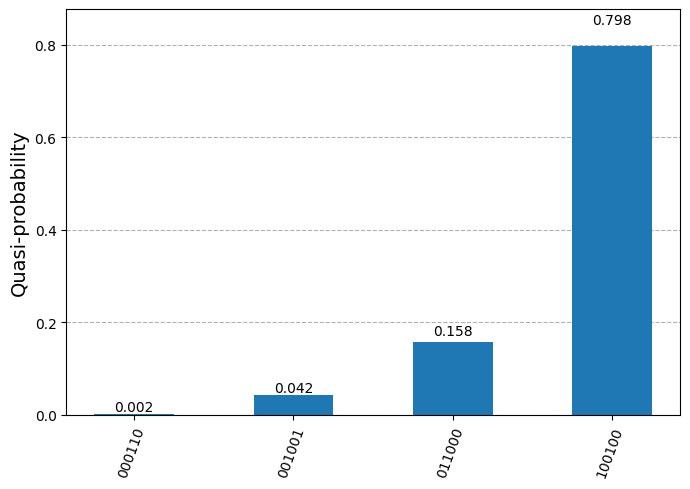

In [39]:
backend = AerSimulator()
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=3)
transpiled_circuit = pass_manager.run(meas) #quantum_circuit

sampler = Sampler(mode=backend)
job_result = sampler.run([transpiled_circuit], shots=1024).result()
counts = job_result[0].data.measurement.get_counts()
# Note: The exact access pattern may vary with Qiskit version;
# sometimes it's .data.c or .data.meas — adjust accordingly based on your transpiled circuit.

print("Raw Counts:", counts)
plot_distribution(counts)

In [40]:
print(transpiled_circuit.depth())
print(transpiled_circuit.count_ops())

1702
OrderedDict({'cx': 960, 'sdg': 636, 's': 240, 'u3': 160, 'barrier': 150, 'p': 80, 'measure': 6, 'x': 2})


In [42]:
# COMPUTING FIDELITY
shots = sum(counts.values())

p_meas = {k: v/shots for k, v in counts.items()}
print(p_meas)

{'100100': 0.7978515625, '011000': 0.158203125, '001001': 0.0419921875, '000110': 0.001953125}


In [43]:
# MAKING THE KEYS SAME BECAUSE IN OUR CASE, MEASURED PROBABILITIES ARE ONLY 4 WHILE EXACT CONTAINS MORE THAN THAT
all_keys = set(p_exact.keys()).union(p_meas.keys())

for key in all_keys:
    if key not in p_exact:
        p_exact[key] = 0
    if key not in p_meas:
        p_meas[key] = 0

In [44]:
F = (sum(np.sqrt(p_exact[k] * p_meas[k]) for k in all_keys))**2

print("Fidelity =", F)

Fidelity = 0.996791655544651


### **Run the circuit for multiple values of $\epsilon$**

In [6]:
def build_circuit(eps, troter_steps):
    # DEFINE VARIABLES
    w0,u0,w1,u1 = 0.90,1,1.35,math.sqrt(2)
    theta_1 = (w0 * u0 * eps)
    theta_2 = (w0 * u1 * eps)
    theta_3 = (w1 * u0 * eps)
    theta_4 = (w1 * u1 * eps)
    print(theta_1, theta_2, theta_3, theta_4)
    # FOR TROTTERIZATION
    dtheta_1 = theta_1 / troter_steps
    dtheta_2 = theta_2 / troter_steps
    dtheta_3 = theta_3 / troter_steps
    dtheta_4 = theta_4 / troter_steps
    b0 = QuantumRegister(1, "b0")
    b1 = QuantumRegister(1,"b1")
    b2 = QuantumRegister(1,"b2")

    a0 = QuantumRegister(1, "a0")
    a1 = QuantumRegister(1,"a1")
    a2 = QuantumRegister(1,"a2")
    creg = ClassicalRegister(6,name = "measurement")
    quantum_circuit = QuantumCircuit(b0,a0,b1,a1,b2,a2,creg)
    # INITIAL STATE 001001
    quantum_circuit.x(b1)
    quantum_circuit.x(a2)
    # FIRST BLOCK H00
    # STRING 1
    for _ in range(troter_steps):
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2, b0)

        quantum_circuit.p(dtheta_1,b0)

        quantum_circuit.rx(-np.pi/2, b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        # barrier
        quantum_circuit.barrier(label = "1.2")
        # STRING 2
        quantum_circuit.s(a1)
        quantum_circuit.s(a0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2, b0)

        quantum_circuit.p(dtheta_1,b0)

        quantum_circuit.rx(-np.pi/2, b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(a0)
        quantum_circuit.sdg(a1)
        # barrier
        quantum_circuit.barrier(label = "2.3")
        # STRING 3
        quantum_circuit.s(b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2,b0)

        quantum_circuit.p(dtheta_1, b0)

        quantum_circuit.rx(-np.pi/2,b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(b0)
        quantum_circuit.sdg(b1)
        # barrier
        quantum_circuit.barrier(label = "3.4")
        # STRING 4
        quantum_circuit.s(a1)
        quantum_circuit.s(b1)
        quantum_circuit.s(a0)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2,b0)

        quantum_circuit.p(dtheta_1, b0)

        quantum_circuit.rx(-np.pi/2,b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(b0)
        quantum_circuit.sdg(a0)
        quantum_circuit.sdg(b1)
        quantum_circuit.sdg(a1)
        # Barrier
        quantum_circuit.barrier(label = "BLOCK 2")
        # BLOCK 2
        # STRING 1
        quantum_circuit.cx(b0,a2)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2, b0)

        quantum_circuit.p(dtheta_2,b0)

        quantum_circuit.rx(-np.pi/2, b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a2)
        # BARRIER
        quantum_circuit.barrier(label = "1.2")
        # STRING 2
        quantum_circuit.s(a2)
        quantum_circuit.s(a1)
        quantum_circuit.cx(b0,a2)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2, b0)

        quantum_circuit.p(dtheta_2,b0)

        quantum_circuit.rx(-np.pi/2, b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a2)
        quantum_circuit.sdg(a1)
        quantum_circuit.sdg(a2)
        # BARRIER 
        quantum_circuit.barrier(label = "2.3")
        # STRING 3
        quantum_circuit.s(b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a2)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2,b0)

        quantum_circuit.p(dtheta_2, b0)

        quantum_circuit.rx(-np.pi/2,b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a2)
        quantum_circuit.sdg(b0)
        quantum_circuit.sdg(b1)
        # BARRIER 
        quantum_circuit.barrier(label = "3.4")
        # STRING 4
        quantum_circuit.s(a2)
        quantum_circuit.s(b1)
        quantum_circuit.s(a1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a2)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.s(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.s(b0)
        quantum_circuit.rx(np.pi/2,b0)

        quantum_circuit.p(dtheta_2, b0)

        quantum_circuit.rx(-np.pi/2,b0)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,b1)
        quantum_circuit.sdg(b0)
        quantum_circuit.cx(b0,a2)
        quantum_circuit.sdg(b0)
        quantum_circuit.sdg(a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.sdg(a2)
        # BARRIER
        quantum_circuit.barrier(label = "Block 3")
        # BLOCK 3
        # STRING 1
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2, b1)

        quantum_circuit.p(dtheta_3,b1)

        quantum_circuit.rx(-np.pi/2, b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        # barrier
        quantum_circuit.barrier(label = "1.2")
        # STRING 2
        quantum_circuit.s(a1)
        quantum_circuit.s(a0)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2, b1)

        quantum_circuit.p(dtheta_3,b1)

        quantum_circuit.rx(-np.pi/2, b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(a0)
        quantum_circuit.sdg(a1)
        # barrier
        quantum_circuit.barrier(label = "2.3")
        # STRING 3
        quantum_circuit.s(b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2,b1)

        quantum_circuit.p(dtheta_3, b1)

        quantum_circuit.rx(-np.pi/2,b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.sdg(b2)
        # barrier
        quantum_circuit.barrier(label = "3.4")
        # STRING 4
        quantum_circuit.s(a1)
        quantum_circuit.s(b2)
        quantum_circuit.s(a0)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2,b1)

        quantum_circuit.p(dtheta_3, b1)

        quantum_circuit.rx(-np.pi/2,b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a0)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.sdg(a0)
        quantum_circuit.sdg(b2)
        quantum_circuit.sdg(a1)
        # Barrier 
        quantum_circuit.barrier(label = "Block 4")
        # BLOCK 4
        # STRING 1
        quantum_circuit.cx(b1,a2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2, b1)

        quantum_circuit.p(dtheta_4,b1)

        quantum_circuit.rx(-np.pi/2, b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a2)
        # barrier
        quantum_circuit.barrier(label = "1.2")
        # STRING 2
        quantum_circuit.s(a2)
        quantum_circuit.s(a1)
        quantum_circuit.cx(b1,a2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2, b1)

        quantum_circuit.p(dtheta_4,b1)

        quantum_circuit.rx(-np.pi/2, b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a2)
        quantum_circuit.sdg(a1)
        quantum_circuit.sdg(a2)
        # barrier
        quantum_circuit.barrier(label = "2.3")
        # STRING 3
        quantum_circuit.s(b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2,b1)

        quantum_circuit.p(dtheta_4, b1)

        quantum_circuit.rx(-np.pi/2,b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a2)
        quantum_circuit.sdg(b1)
        quantum_circuit.sdg(b2)
        # barrier
        quantum_circuit.barrier(label = "3.4")
        # STRING 4
        quantum_circuit.s(a2)
        quantum_circuit.s(b2)
        quantum_circuit.s(a1)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.s(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.s(b1)
        quantum_circuit.rx(np.pi/2,b1)

        quantum_circuit.p(dtheta_4, b1)

        quantum_circuit.rx(-np.pi/2,b1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a1)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,b2)
        quantum_circuit.sdg(b1)
        quantum_circuit.cx(b1,a2)
        quantum_circuit.sdg(b1)
        quantum_circuit.sdg(a1)
        quantum_circuit.sdg(b2)
        quantum_circuit.sdg(a2)
        # quantum_circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
        # quantum_circuit.draw("mpl", fold = 51)
    return quantum_circuit
eps_list = [0.02, 0.05, 0.1, 0.15, 0.2]
troter_steps = 10
for eps in eps_list:
    psi_exact_ls = []
    quantum_circuit = build_circuit(eps, troter_steps)
    print("Running for epsilon =", eps)
    # compute exact state
    psi_exact = Statevector.from_instruction(quantum_circuit)
    psi_exact_ls.append(psi_exact)
    print(psi_exact_ls)

0.018000000000000002 0.025455844122715714 0.027000000000000003 0.03818376618407357
Running for epsilon = 0.02
[Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -2.61498399e-03-5.77295157e-04j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -1.09554983e-02+4.96253126e-02j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0